## Exploratory Data Analysis

#### 1.1. Imports

In [5]:
!pip install matplotlib
!pip install seaborn

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2. Reading the data

In [7]:
mlog_stats = pd.read_csv('../data/mlog_stats_10000.csv')
impression_data = pd.read_csv('../data/impression_data_10000.csv')
mlog_demographics = pd.read_csv('../data/mlog_demographics_10000.csv')
user_demographics = pd.read_csv('../data/user_demographics_10000.csv')

In [8]:

print(mlog_stats.head())
print(mlog_demographics.head())
print(impression_data.head())
print(user_demographics.head())

           mlogId  dt  userImprssionCount  userClickCount  userLikeCount  \
0  KCNCLCICKCHCLC  26                7907              71              1   
1  KCOCNCHCGCHCIC  30                   1               0              0   
2  NCKCMCKCNCNCOC  11                 169              15              1   
3  NCJCOCJCLCGCJC  14                 324              27              2   
4  NCGCOCKCOCOCKC  17                 154              10              2   

   userCommentCount  userShareCount  userViewCommentCount  \
0                 0               0                     3   
1                 0               0                     0   
2                 0               0                     0   
3                 1               0                     7   
4                 0               0                     4   

   userIntoPersonalHomepageCount  userFollowCreatorCount  
0                              0                       0  
1                              0                       0  

#### 2. Statistics

In [9]:
imp = impression_data.copy()
ud = user_demographics.copy()

In [ ]:
# --- Impression data: engagement statistics ---
cols = ["isLike", "isViewComment", "isShare", "isComment"]
eng_stats = {}
for c in cols:
    if c in imp.columns:
        eng_stats[c] = {
            "Total": int(imp[c].sum()),
            "Share of total impressions": round(imp[c].mean()*100, 2),
        }

eng_df = pd.DataFrame(eng_stats).T
print("\nEngagement statistics (impression_data):")
print(eng_df)


Engagement statistics (impression_data):
               Total  Share of total impressions
isLike          40.0                        0.40
isViewComment  101.0                        1.01
isShare          1.0                        0.01
isComment        3.0                        0.03


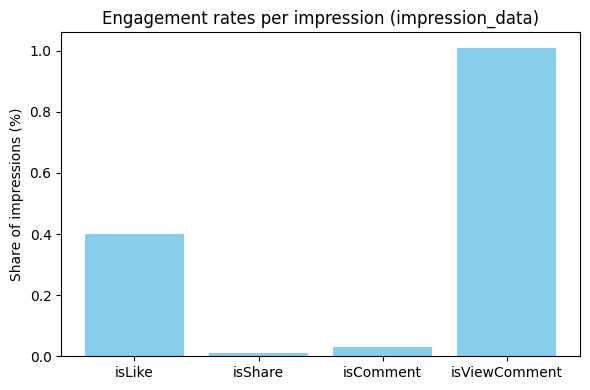

In [11]:
eng_cols = ["isLike", "isShare", "isComment", "isViewComment"]

eng_rates = {}
for c in eng_cols:
    if c in imp.columns:
        eng_rates[c] = imp[c].mean() * 100  # percentage

# Bar plot of engagement rates
plt.figure(figsize=(6,4))
plt.bar(eng_rates.keys(), eng_rates.values(), color="skyblue")
plt.ylabel("Share of impressions (%)")
plt.title("Engagement rates per impression (impression_data)")
plt.tight_layout()
plt.show()

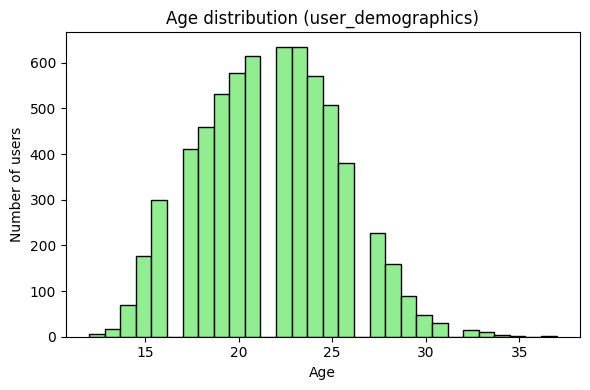

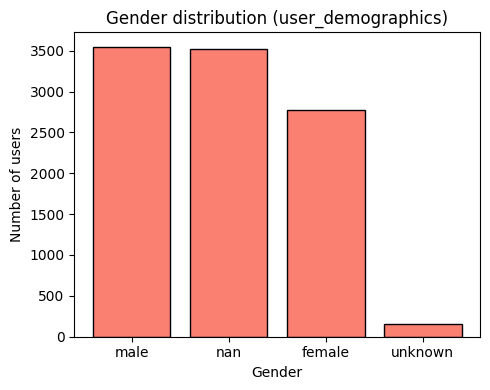

In [ ]:
# --- Age distribution ---
if "age" in ud.columns:
    plt.figure(figsize=(6,4))
    plt.hist(ud["age"].dropna(), bins=30, color="lightgreen", edgecolor="black")
    plt.xlabel("Age")
    plt.ylabel("Number of users")
    plt.title("Age distribution")
    plt.tight_layout()
    plt.show()

# --- Gender distribution ---
if "gender" in ud.columns:
    gender_counts = ud["gender"].value_counts(dropna=False)
    plt.figure(figsize=(5,4))
    plt.bar(gender_counts.index.astype(str), gender_counts.values, color="salmon", edgecolor="black")
    plt.xlabel("Gender")
    plt.ylabel("Number of users")
    plt.title("Gender distribution")
    plt.tight_layout()
    plt.show()

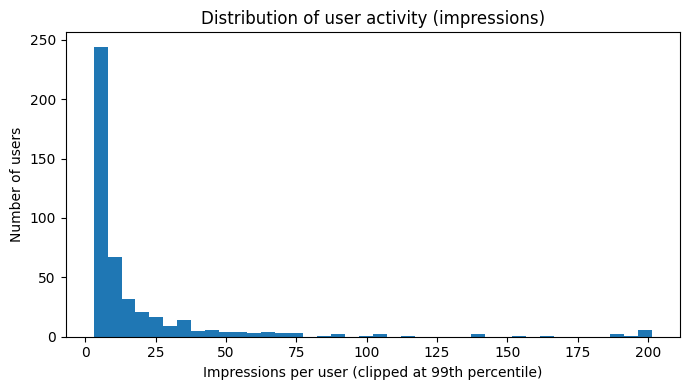

In [13]:
# ---------- Per-user aggregates ----------
user_agg = imp.groupby("userId").agg(
    impressions = ("mlogId","count"),
    clicks      = ("isClick","sum"),
    likes       = ("isLike","sum"),
    shares      = ("isShare","sum"),
    comments    = ("isComment","sum")
).reset_index()

# Rates (protect against division by zero)
user_agg["ctr"]        = user_agg["clicks"] / user_agg["impressions"].replace(0, np.nan)
user_agg["like_rate"]  = user_agg["likes"]  / user_agg["impressions"].replace(0, np.nan)
user_agg["share_rate"] = user_agg["shares"] / user_agg["impressions"].replace(0, np.nan)
user_agg["comment_rate"]= user_agg["comments"]/ user_agg["impressions"].replace(0, np.nan)

# ---------------------------------------------------------
# 1) Histogram: impressions per user (heavy-tail check)
# ---------------------------------------------------------
plt.figure(figsize=(7,4))
# Cap extreme tail to improve readability (optional)
cap = user_agg["impressions"].quantile(0.99)
vals = user_agg["impressions"].clip(upper=cap)
plt.hist(vals.dropna(), bins=40)
plt.xlabel("Impressions per user (clipped at 99th percentile)")
plt.ylabel("Number of users")
plt.title("Distribution of user activity (impressions)")
plt.tight_layout()
plt.show()